In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the dataset
raw_data = pd.read_csv(r'D:\ineuron\Assignments\class_assignment\Regression_project\Notebook\data\finalTrain.csv')
raw_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
# getting the shape of data
print(f'There are total {raw_data.shape[0]} number data points and {raw_data.shape[1]} number of features present in the dataset')

There are total 45584 number data points and 20 number of features present in the dataset


In [5]:
# checking percntage of missing values for each feature in the dataset
raw_data.isnull().sum() / raw_data.shape[0] *100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

* There are missing values present in the data set
* We will observe the records having missing values

In [6]:
# displaying the records having missing values 
# https://stackoverflow.com/a/43424223/16831295

dup_record = raw_data[raw_data.isnull().any(axis=1)]
dup_record 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
8,0x6f67,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20-03-2022,20:40,20:50,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41
33,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33
49,0xb002,JAPRES14DEL01,32.0,4.5,26.888420,75.800689,26.898420,75.810689,26-03-2022,09:25,09:40,Windy,Low,2,Buffet,scooter,0.0,No,NaN,20
65,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30,NaN,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19
77,0x837c,PUNERES14DEL02,39.0,4.8,18.516216,73.842527,18.566216,73.892527,03-03-2022,21:55,22:10,Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaN,09:05,NaN,NaN,3,Meal,electric_scooter,1.0,No,Urban,17
45517,0x1ed1,JAPRES18DEL01,NaN,NaN,26.913987,75.752891,27.023987,75.862891,27-03-2022,20:35,20:45,Cloudy,Jam,2,Snack,scooter,0.0,No,Metropolitian,48
45541,0x7483,INDORES04DEL01,23.0,4.6,22.753659,75.903365,22.763659,75.913365,11-03-2022,08:40,08:45,Cloudy,Low,2,Snack,scooter,1.0,No,NaN,12
45557,0x1163,SURRES06DEL02,NaN,NaN,21.185047,72.808590,21.205047,72.828590,03-04-2022,NaN,10:50,Windy,Low,2,Meal,scooter,0.0,No,Urban,12


In [7]:
print(f'Total number of  records with missing value = {dup_record.shape[0]} ({dup_record.shape[0]/raw_data.shape[0] * 100} % of all records)')

Total number of  records with missing value = 4225 (9.268603018603018 % of all records)


. Over 9% of total data points have missing values so we cant drop them we will to handle the missing values

In [8]:
# getting basic information of the data set
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

* Dataset contains both categorical and numeric features
* Here columns Order_Date, Time_Orderd, Time_Order_picked have Dtpe object we woould like change its dtype create some useful feature from these coumns 

In [9]:
# chaging dtype of Order_Date to datetime
raw_data['Order_Date']=pd.to_datetime(raw_data['Order_Date'],format="%d-%m-%Y")
print(f"Now dtype of column 'Order_Date'  is {raw_data['Order_Date'].dtype}")

# creating three new features order_day,order_month,order_year  
raw_data['Day']=raw_data['Order_Date'].dt.day
raw_data['Month']=raw_data['Order_Date'].dt.month
raw_data['Year']=raw_data['Order_Date'].dt.year

# droping the column Order_Date since now it has no use
raw_data=raw_data.drop(labels=['Order_Date'],axis=1)

raw_data.head()


Now dtype of column 'Order_Date'  is datetime64[ns]


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


In [10]:
# checking the coloumn 'Time_ordered'
raw_data['Time_Orderd']

0        21:55
1        14:55
2        17:30
3        09:20
4        19:50
         ...  
45579    11:35
45580    19:55
45581    23:50
45582    13:35
45583    17:10
Name: Time_Orderd, Length: 45584, dtype: object

In [11]:
# converting the values of 'Time_ordered' features to hours only
raw_data['Time_Orderd'].map(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60)

IndexError: list index out of range

In [14]:
# getting the values causing issues
raw_data['Time_Orderd'][raw_data['Time_Orderd'].map(str).map(lambda x: x.split(':')).map(len) < 2]

28       0.458333333
31       0.958333333
33               NaN
38       0.791666667
65               NaN
            ...     
45522              1
45544    0.541666667
45545    0.416666667
45557            NaN
45573          0.375
Name: Time_Orderd, Length: 5799, dtype: object

* There are some records which have only hours value and some missing values so will handle these

In [15]:
# a function to handle the issues and transformig the feature have time values

def time_in_hrs(time):
    """
    function to convert time in format hrs: min to hour of the data
    """
    # handling nan values
    if time is np.nan:
        return time
    
    
    hrs_min = time.split(':') 
    # handling values containg only hrs data
    if len(hrs_min) < 2:
        return float(hrs_min[0])

    return float(hrs_min[0]) + float(hrs_min[1])/60

In [16]:
raw_data['Time_Orderd'].map(time_in_hrs).astype(float)

0        21.916667
1        14.916667
2        17.500000
3         9.333333
4        19.833333
           ...    
45579    11.583333
45580    19.916667
45581    23.833333
45582    13.583333
45583    17.166667
Name: Time_Orderd, Length: 45584, dtype: float64

In [17]:
# transforming features Time_Orderd and Time_Order_picked
# we will convert the values of both feature into hours with dtype of float

##Fetaure Engineering Process
raw_data['Time_Orderd']=raw_data['Time_Orderd'].map(time_in_hrs).astype(float)
raw_data['Time_Order_picked']=raw_data['Time_Order_picked'].map(time_in_hrs).astype(float)

# observing the trandformed data
raw_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21.916667,22.166667,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14.916667,15.083333,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17.500000,17.666667,...,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,9.333333,9.500000,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.833333,20.083333,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


In [18]:
# getting basic information of the transformed data set
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Time_Orderd                  43853 non-null  float64
 9   Time_Order_picked            45584 non-null  float64
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

In [19]:
raw_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21.916667,22.166667,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14.916667,15.083333,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17.500000,17.666667,...,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,9.333333,9.500000,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.833333,20.083333,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


* Id is an unique assigined to each data point Delivery_person_ID assigned to a delivery person agent  both have no predictive power so we will drop both

In [20]:
# dropping id
raw_data=raw_data.drop(labels=['ID','Delivery_person_ID'],axis=1)
raw_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21.916667,22.166667,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14.916667,15.083333,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17.500000,17.666667,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,9.333333,9.500000,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.833333,20.083333,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


In [21]:
print(f'After droping ID and Delivery_person_ID number of feaures of the transformed data set = {raw_data.shape[1]}')

After droping ID and Delivery_person_ID number of feaures of the transformed data set = 20


In [22]:
## check for duplicated records
raw_data.duplicated().sum()

0

* There is no duplicate data

In [23]:
# segregating numerical and categorcal features

numerical_columns=raw_data.columns[raw_data.dtypes!='object']
categorical_columns=raw_data.columns[raw_data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('\n')
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)', 'Day',
       'Month', 'Year'],
      dtype='object')


Categorical Columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [24]:
# basic statics of all numerical features
raw_data[numerical_columns].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken (min),Day,Month,Year
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,43853.000000,45584.000000,45584.000000,44591.000000,45584.000000,45584.000000,45584.000000,45584.0
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,16.509017,16.709593,1.023385,0.744635,26.293963,13.810920,2.980673,2022.0
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,6.629943,6.636728,0.839055,0.572510,9.384298,8.708532,0.545939,0.0
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.375000,0.375000,0.000000,0.000000,10.000000,1.000000,2.000000,2022.0
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,11.833333,12.083333,0.000000,0.000000,19.000000,6.000000,3.000000,2022.0
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,18.750000,18.916667,1.000000,1.000000,26.000000,13.000000,3.000000,2022.0
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,21.416667,21.583333,2.000000,1.000000,32.000000,20.000000,3.000000,2022.0
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,23.916667,24.250000,3.000000,3.000000,54.000000,31.000000,4.000000,2022.0


In [25]:
# basic statics of all categorical  features
raw_data[categorical_columns].describe()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,44968,44983,45584,45584,45356,44384
unique,6,4,4,4,2,3
top,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,7653,15476,11530,26429,44460,34087


* Number of categories are less so we can 

In [26]:
# observing the categories present in the catrgorical features
for col in categorical_columns:
    print(f'\nUnique categories in {col}:')
    print(raw_data[col].value_counts())
    # print('\n')


Unique categories in Weather_conditions:
Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

Unique categories in Road_traffic_density:
Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

Unique categories in Type_of_order:
Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

Unique categories in Type_of_vehicle:
Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

Unique categories in Festival:
Festival
No     44460
Yes      896
Name: count, dtype: int64

Unique categories in City:
City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64


### univariate analysis of numerical features

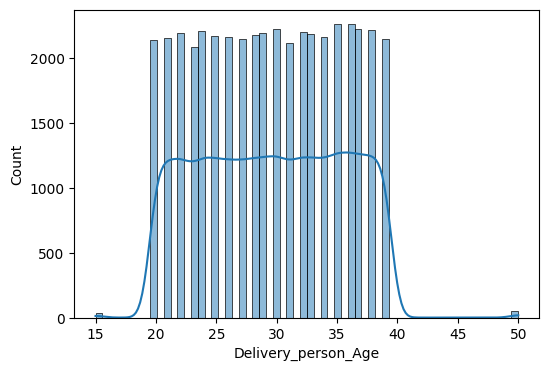

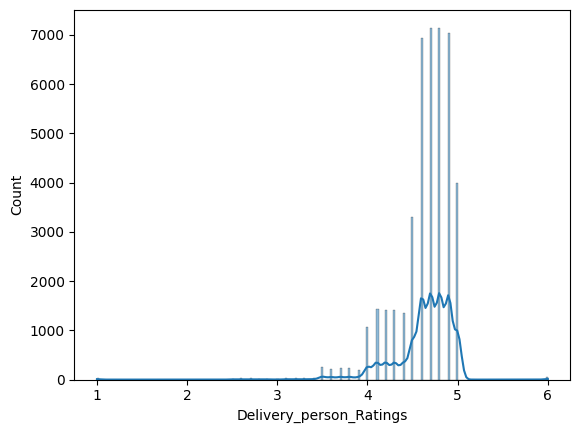

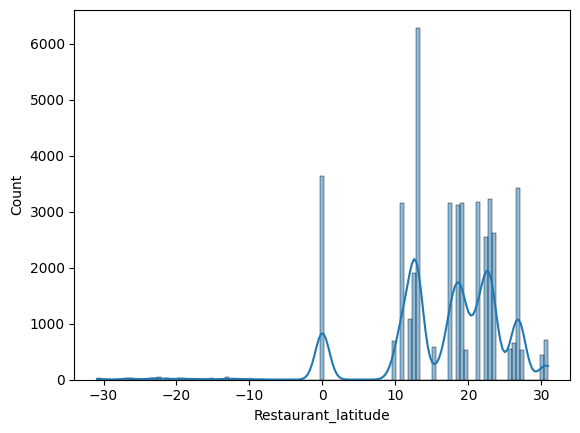

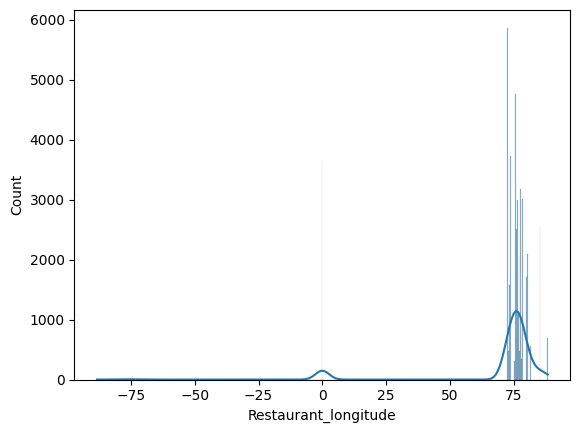

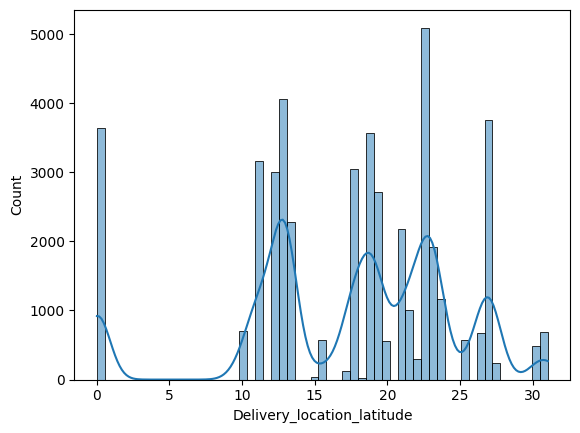

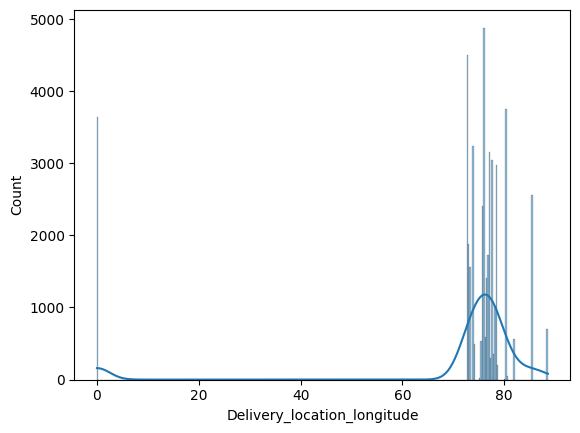

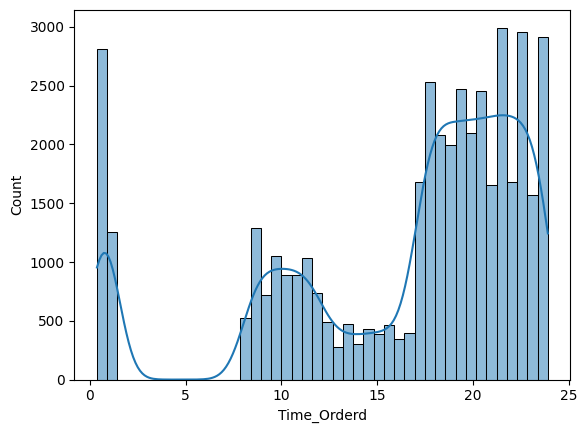

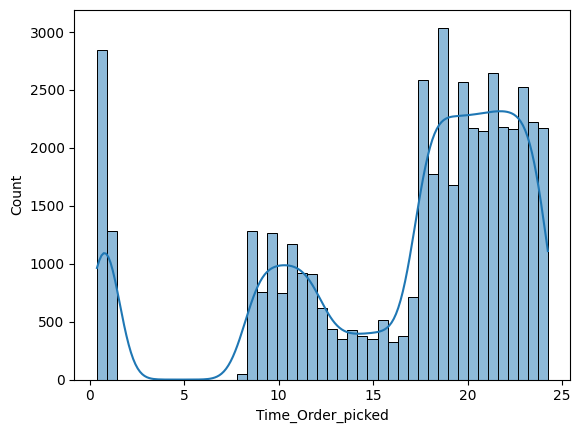

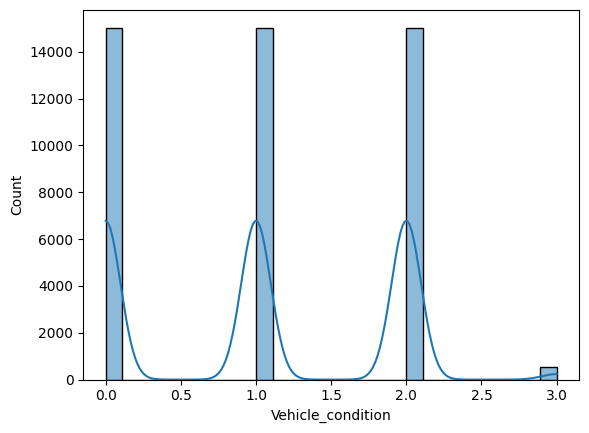

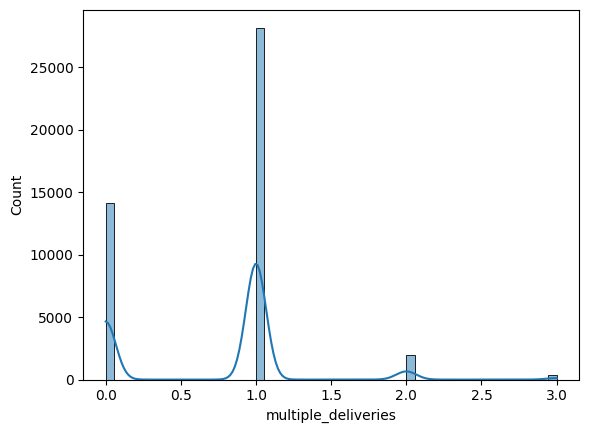

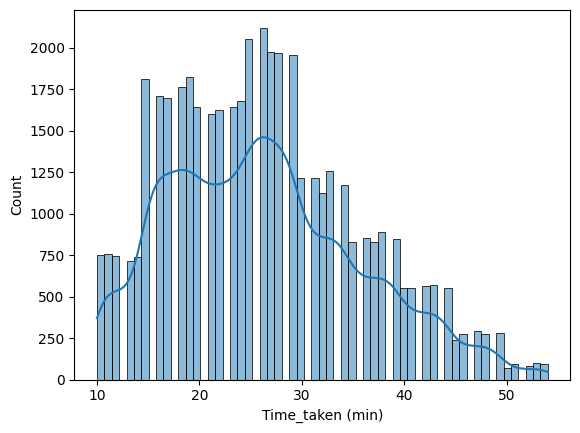

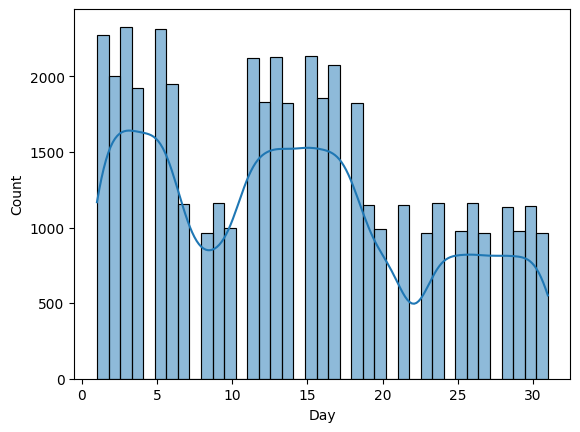

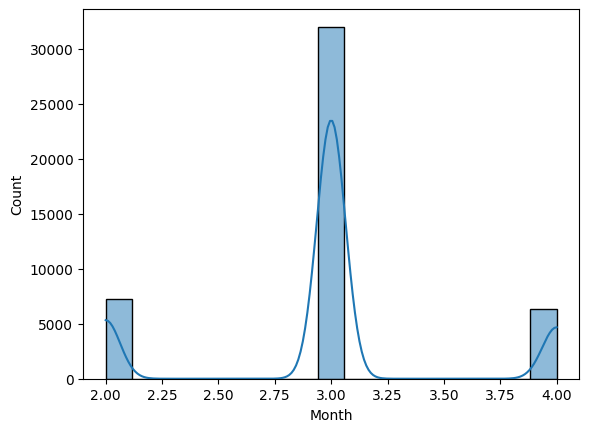

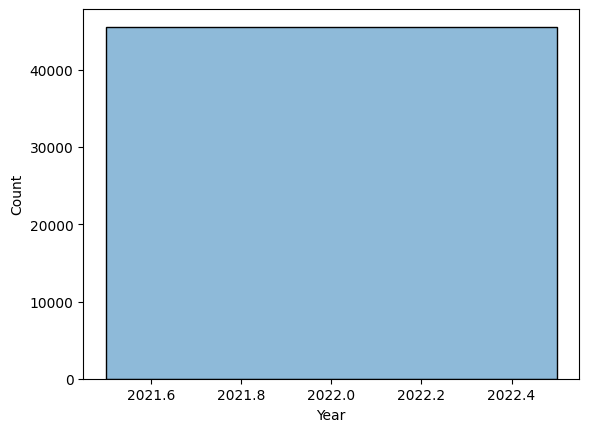

In [ ]:
# getting histogram plot of numerical feature

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
x=0
for i in numerical_columns:
    sns.histplot(data=raw_data,x=i,kde=True)
    print('\n')
    plt.show()

* There is no variablity in column 'year' after doing further analysis  this feature can be dropped 

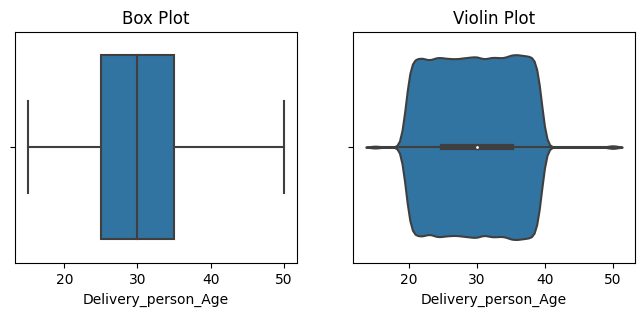

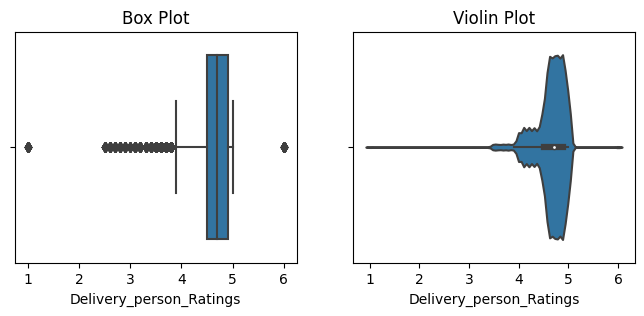

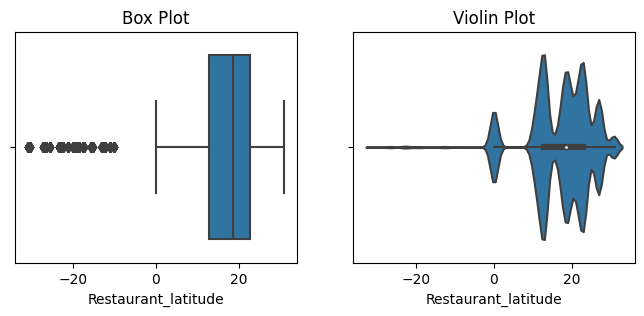

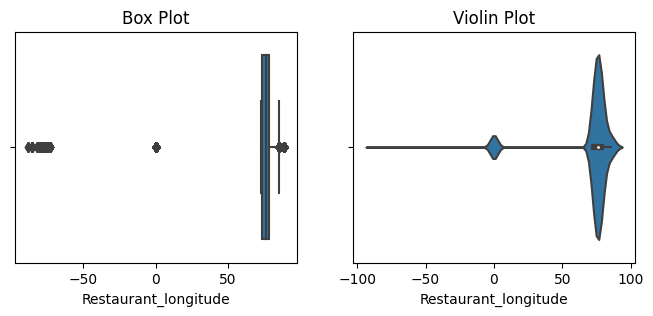

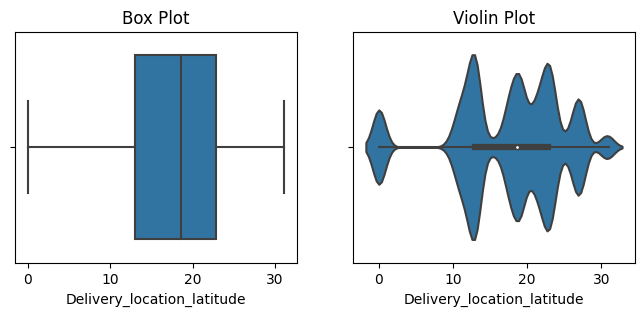

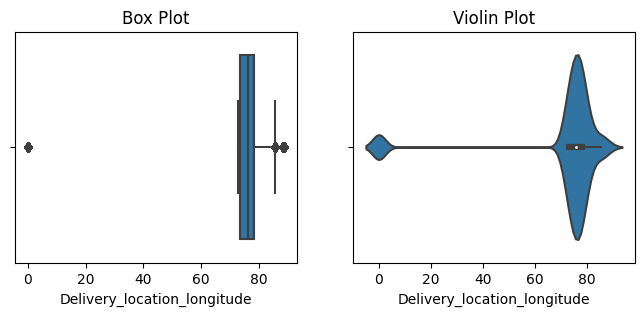

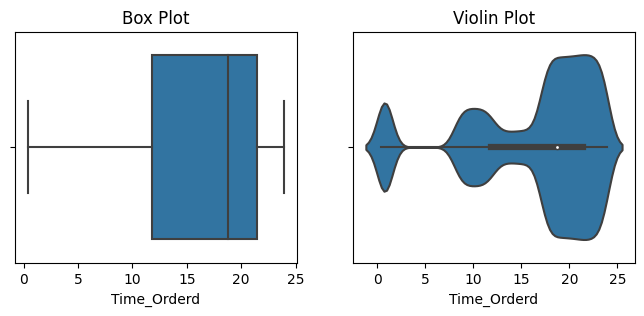

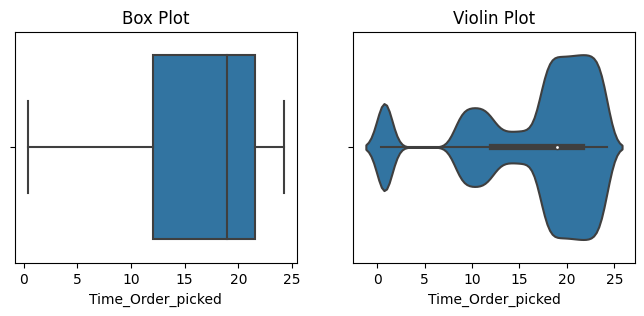

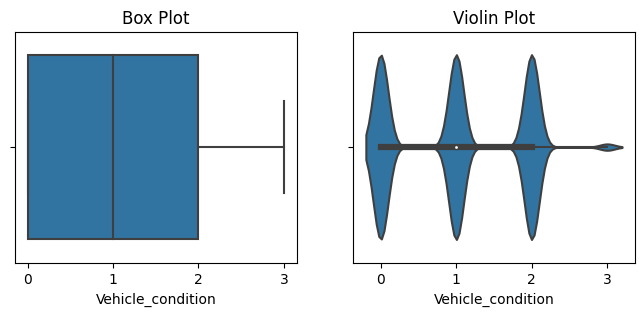

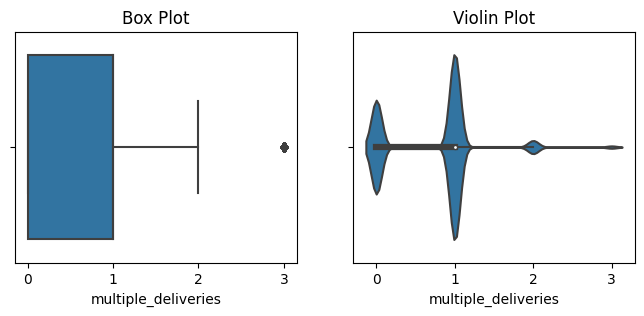

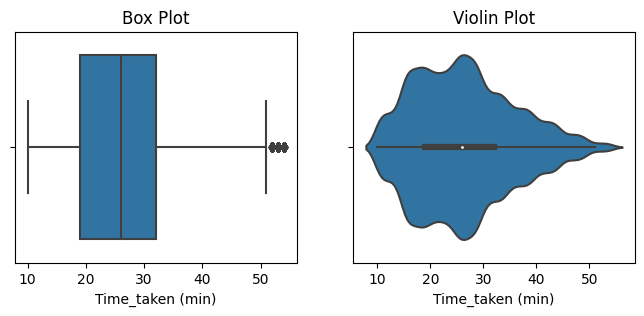

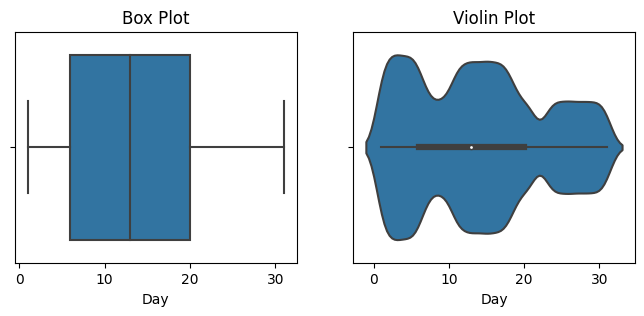

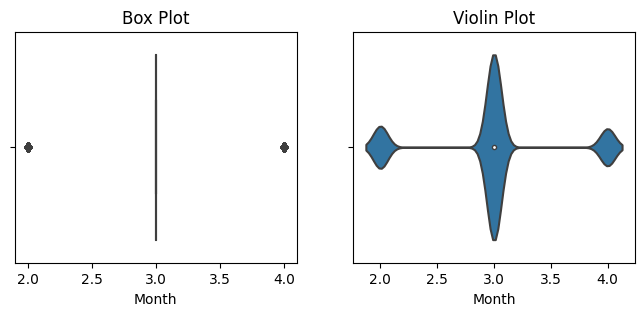

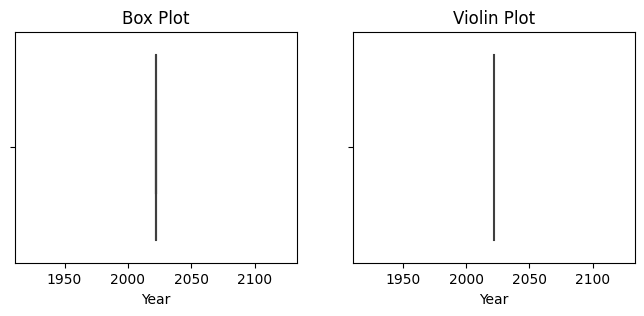

In [ ]:
# box plot of all numerical feautures

# x=0
for i in numerical_columns:
    fig,ax = plt.subplots(nrows=1, ncols=2,sharey=False,figsize=(8,3))
    sns.boxplot(data=raw_data,x=i,ax=ax[0])
    sns.violinplot(data=raw_data,x=i,ax=ax[1])
    ax[0].set_title('Box Plot')
    ax[1].set_title('Violin Plot')
    print('\n')
    plt.show()

* There are outliers present in the some features so we will use median imputation for missing values
* Features 'Year' and 'month' have very less variblity we might drop them

### Bivariate analysis of numerical features

<Axes: >

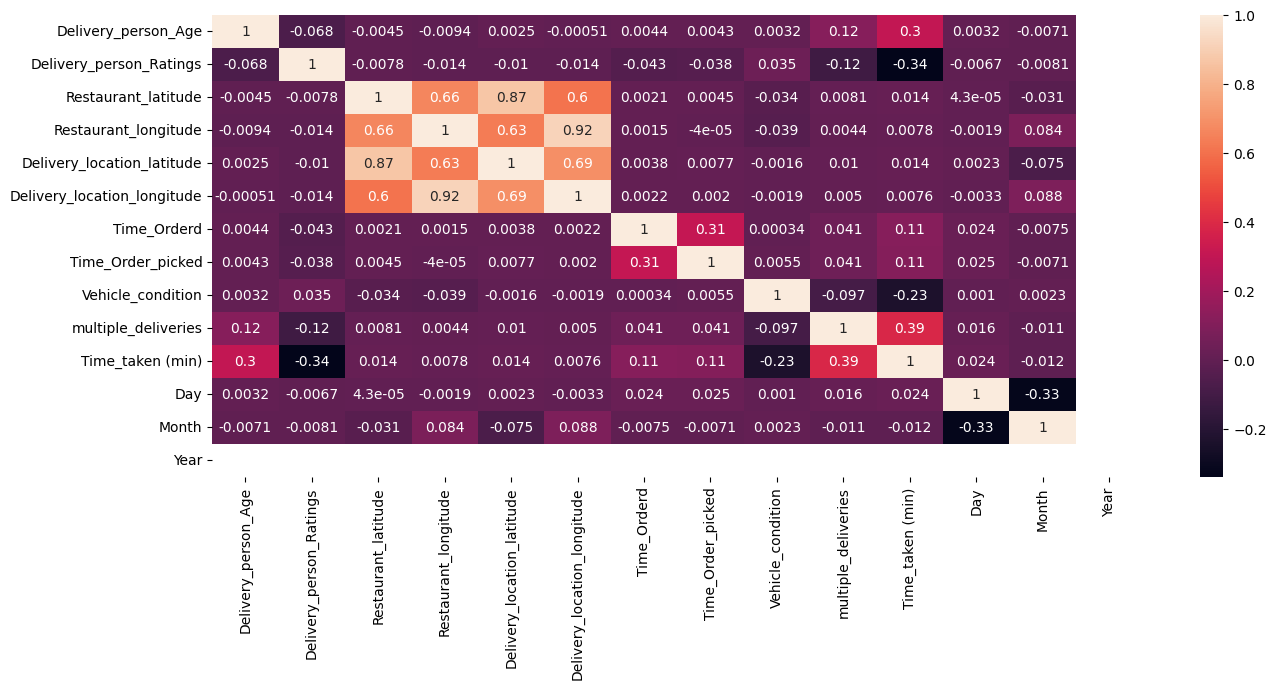

In [ ]:
## correlation
plt.figure(figsize=(15,6))
sns.heatmap(raw_data[numerical_columns].corr(),annot=True)

* There is strong correlation among features 'Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude'and 'Delivery_location_longitude'
* Some of the features from these might be dropped

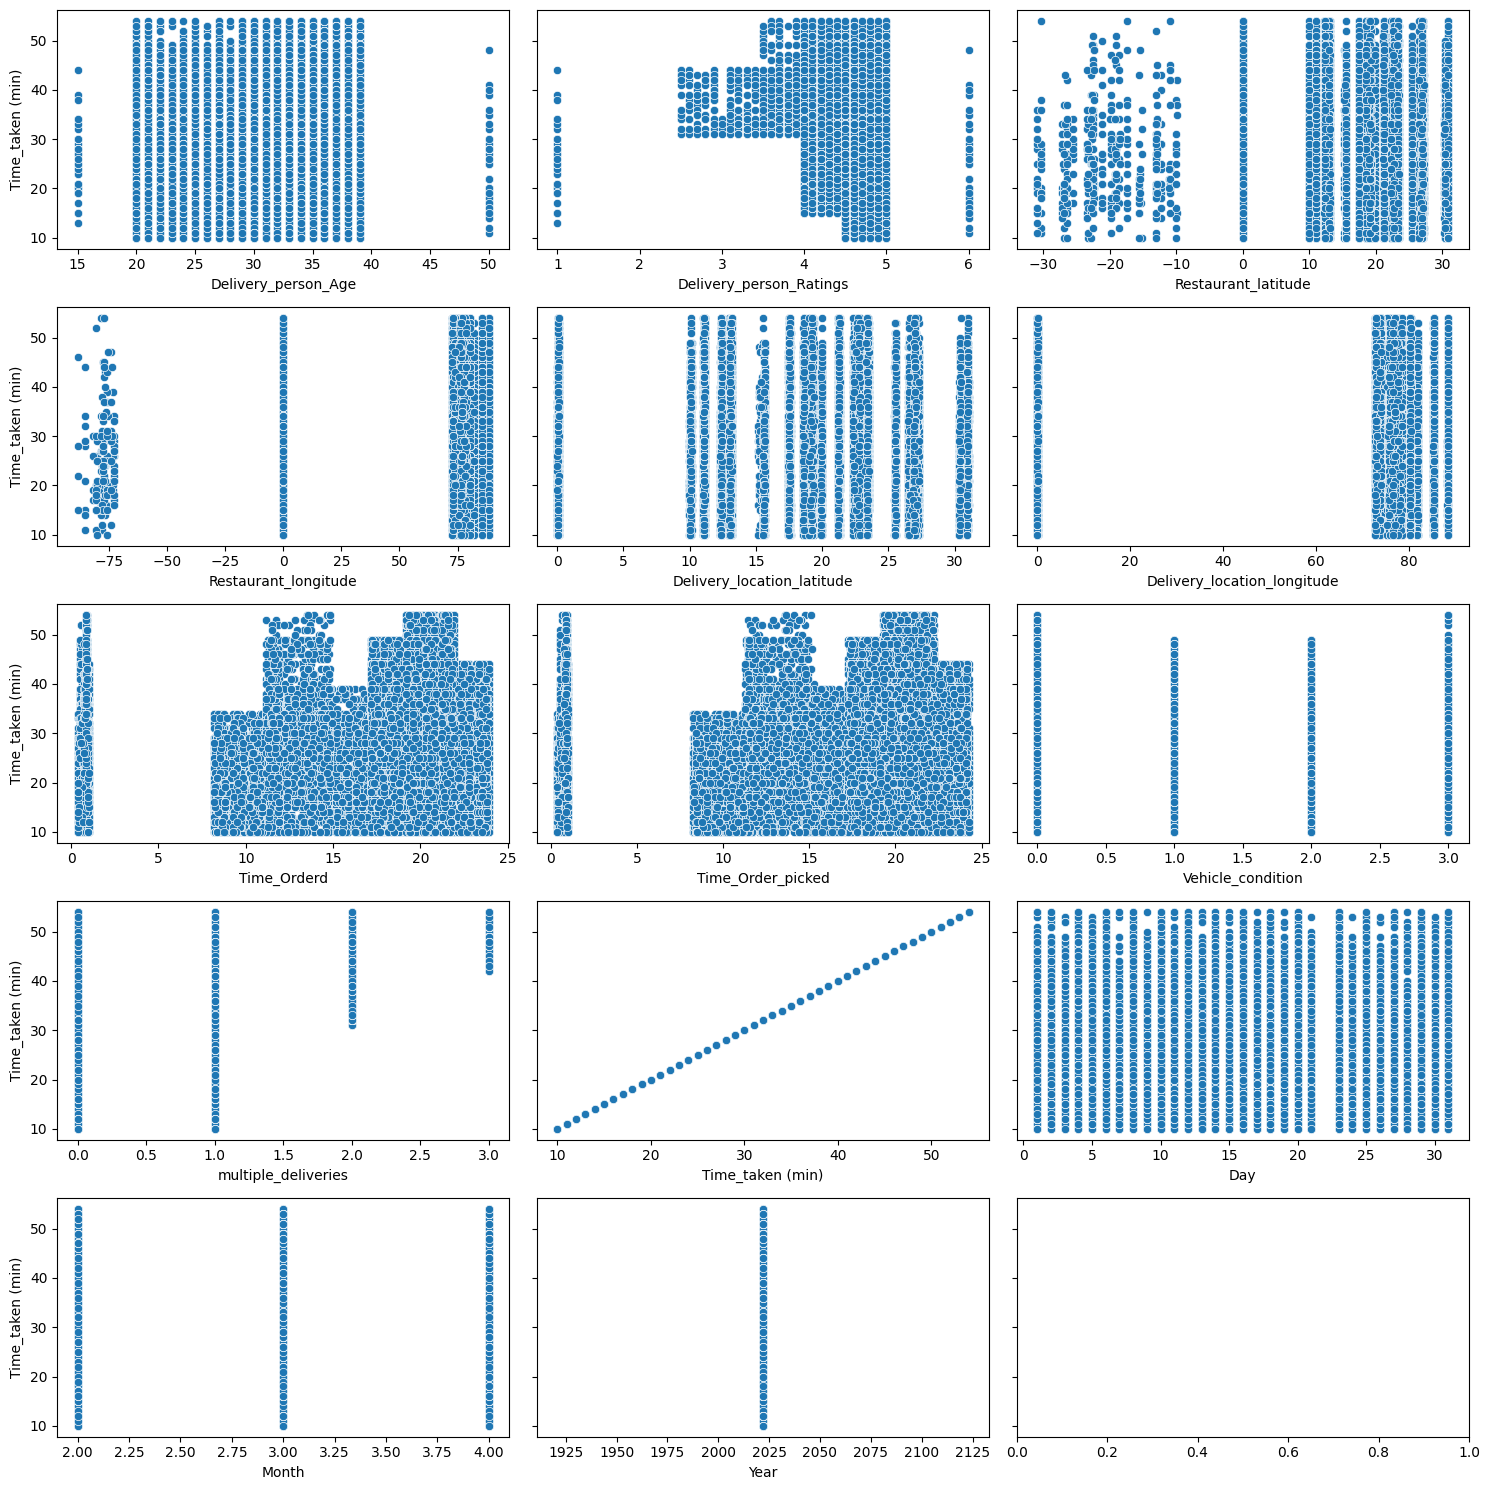

In [ ]:
# scatter plot between numeric features and dependatble variable time_taken
fig,axs = plt.subplots(nrows=5, ncols=3,sharey=True,figsize=(15,15))
i = 0
for col in numerical_columns:
    ax = axs[i//3,i%3] 
    sns.scatterplot(data=raw_data[numerical_columns],x=col,y='Time_taken (min)',ax = ax)
    # ax.set_title(col)
    # print([i//3,i%3])
    i += 1

plt.tight_layout()
plt.show()




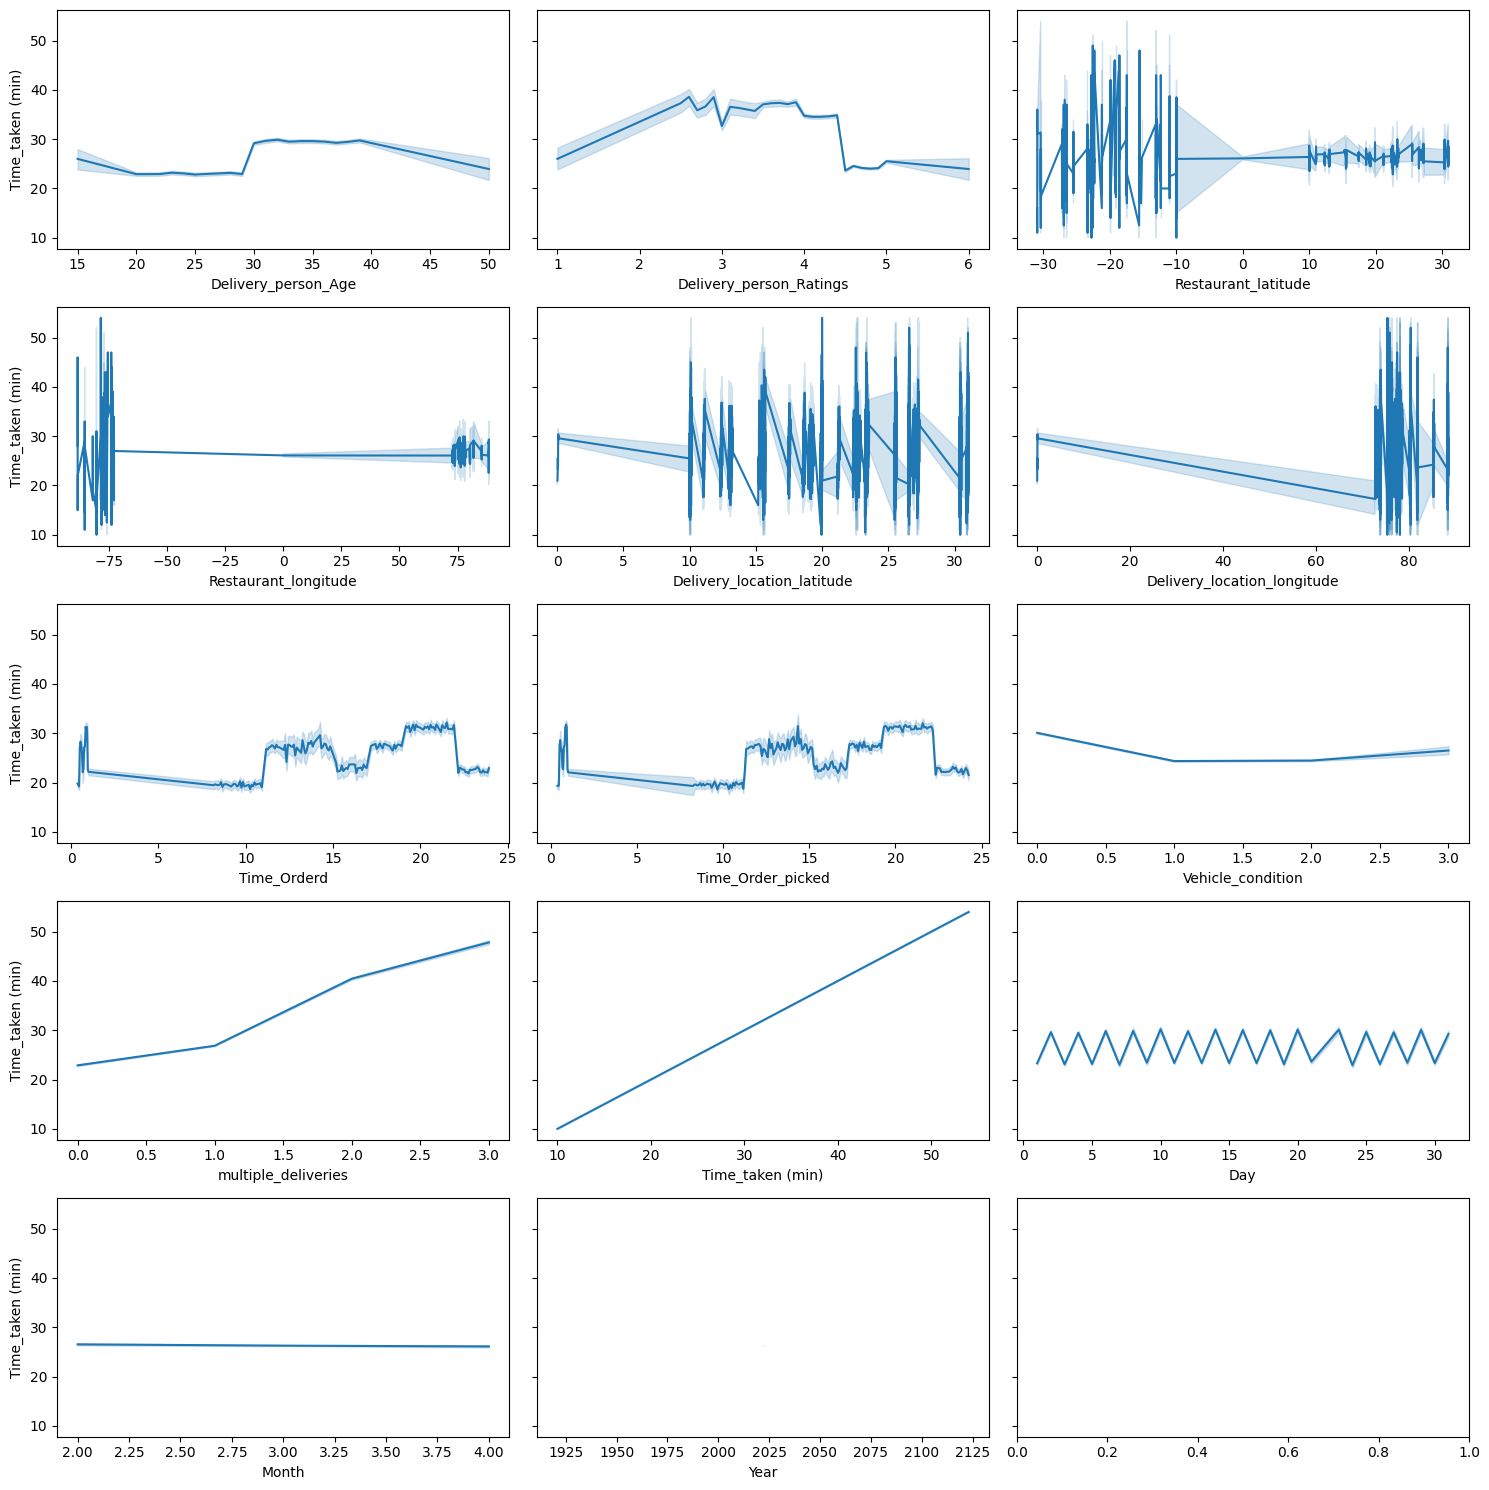

In [ ]:
# line plot between numeric features and dependatble variable time_taken
fig,axs = plt.subplots(nrows=5, ncols=3,sharey=True,figsize=(15,15))
i = 0
for col in numerical_columns:
    ax = axs[i//3,i%3] 
    sns.lineplot(data=raw_data[numerical_columns],x=col,y='Time_taken (min)',ax = ax)

    i += 1

plt.tight_layout()
plt.show()


#### From the scatter and line plot we can say that:
* Reataurant_latitude, Reataurant_longitude, Delivery_location_latitude,Delivery_location_longitude are not looking important
* We create a new feature restuarant_Delivery_location_distance using these four features
* month and year have no variablity so its not useful
* Rest of the feature looks useful in predictiong time taken for a particular delivery

### Analysis of Categorical features


In [ ]:
raw_data[categorical_columns].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,Stormy,High,Meal,motorcycle,No,Metropolitian
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,Fog,Jam,Snack,scooter,No,Metropolitian


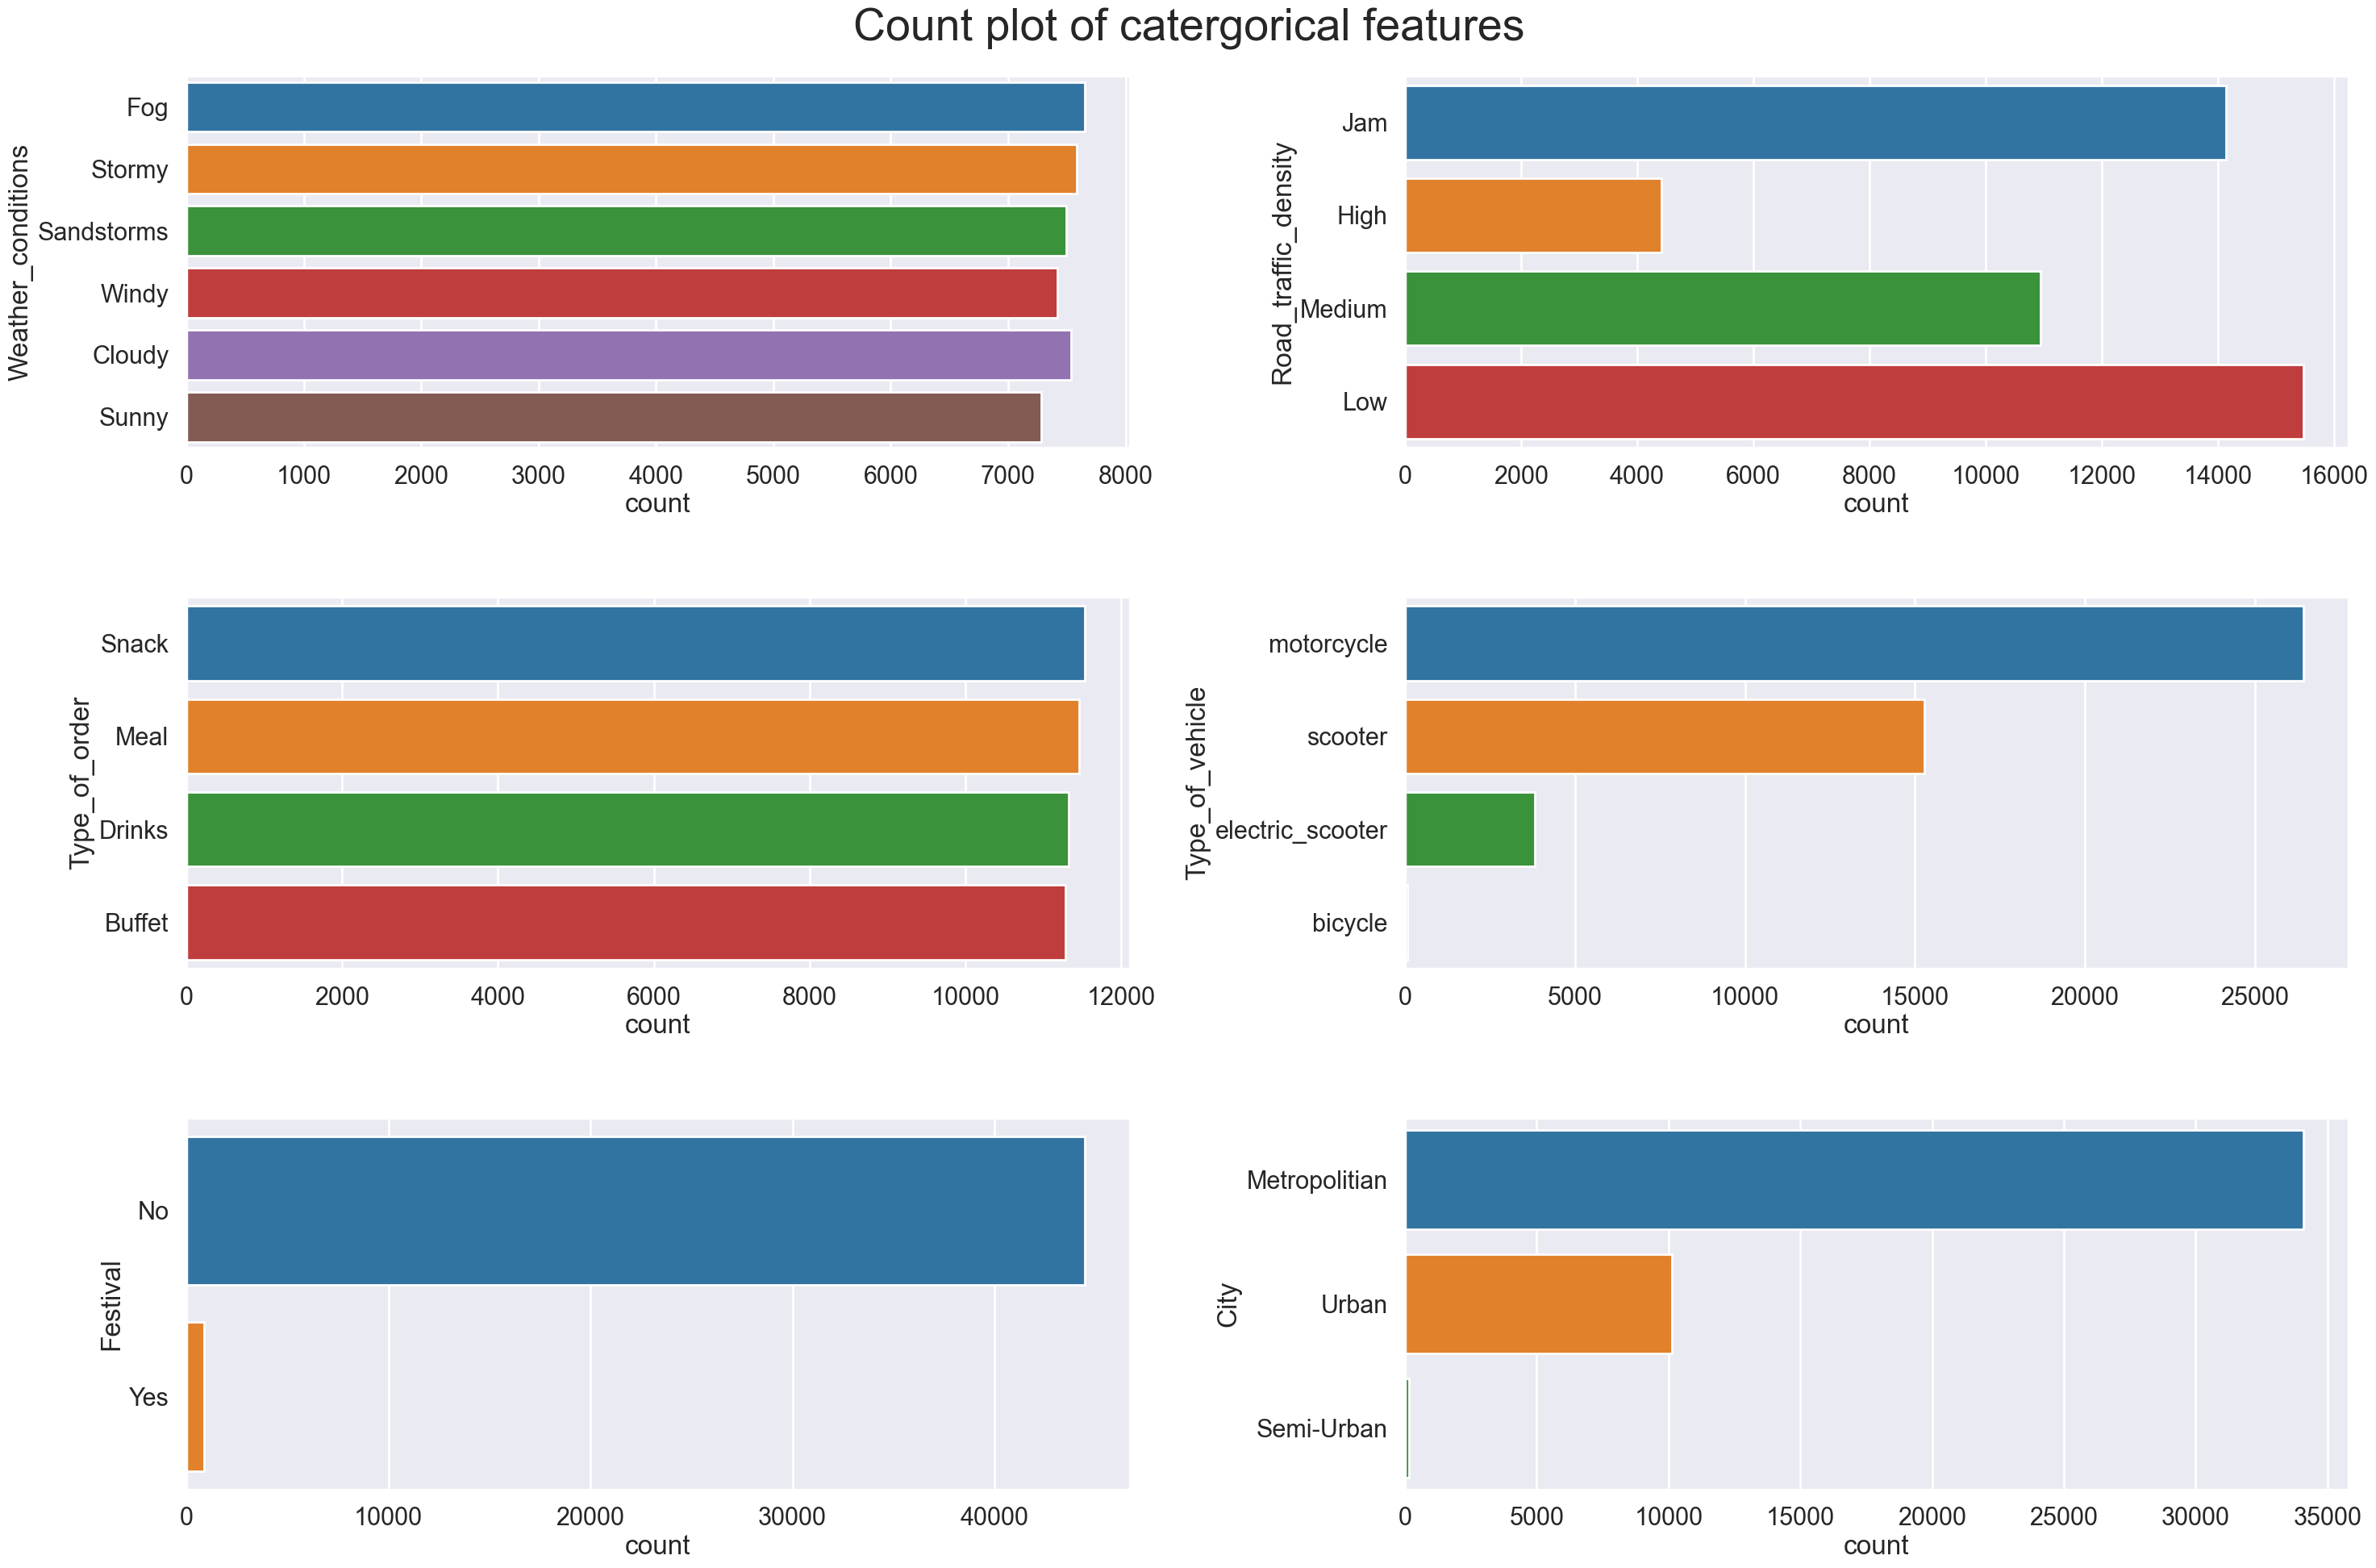

In [ ]:
# Count plot of categorical features

# setting layout of the plot
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(30,20))

for i,col in enumerate(categorical_columns):

    plt.subplot(3,2,i+1)
    sns.countplot(data= raw_data,y= col)
    # plt.xlabel('Installation in Millions')
    # plt.ylabel('')
plt.suptitle('Count plot of catergorical features',size = 40)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .4)
plt.show()

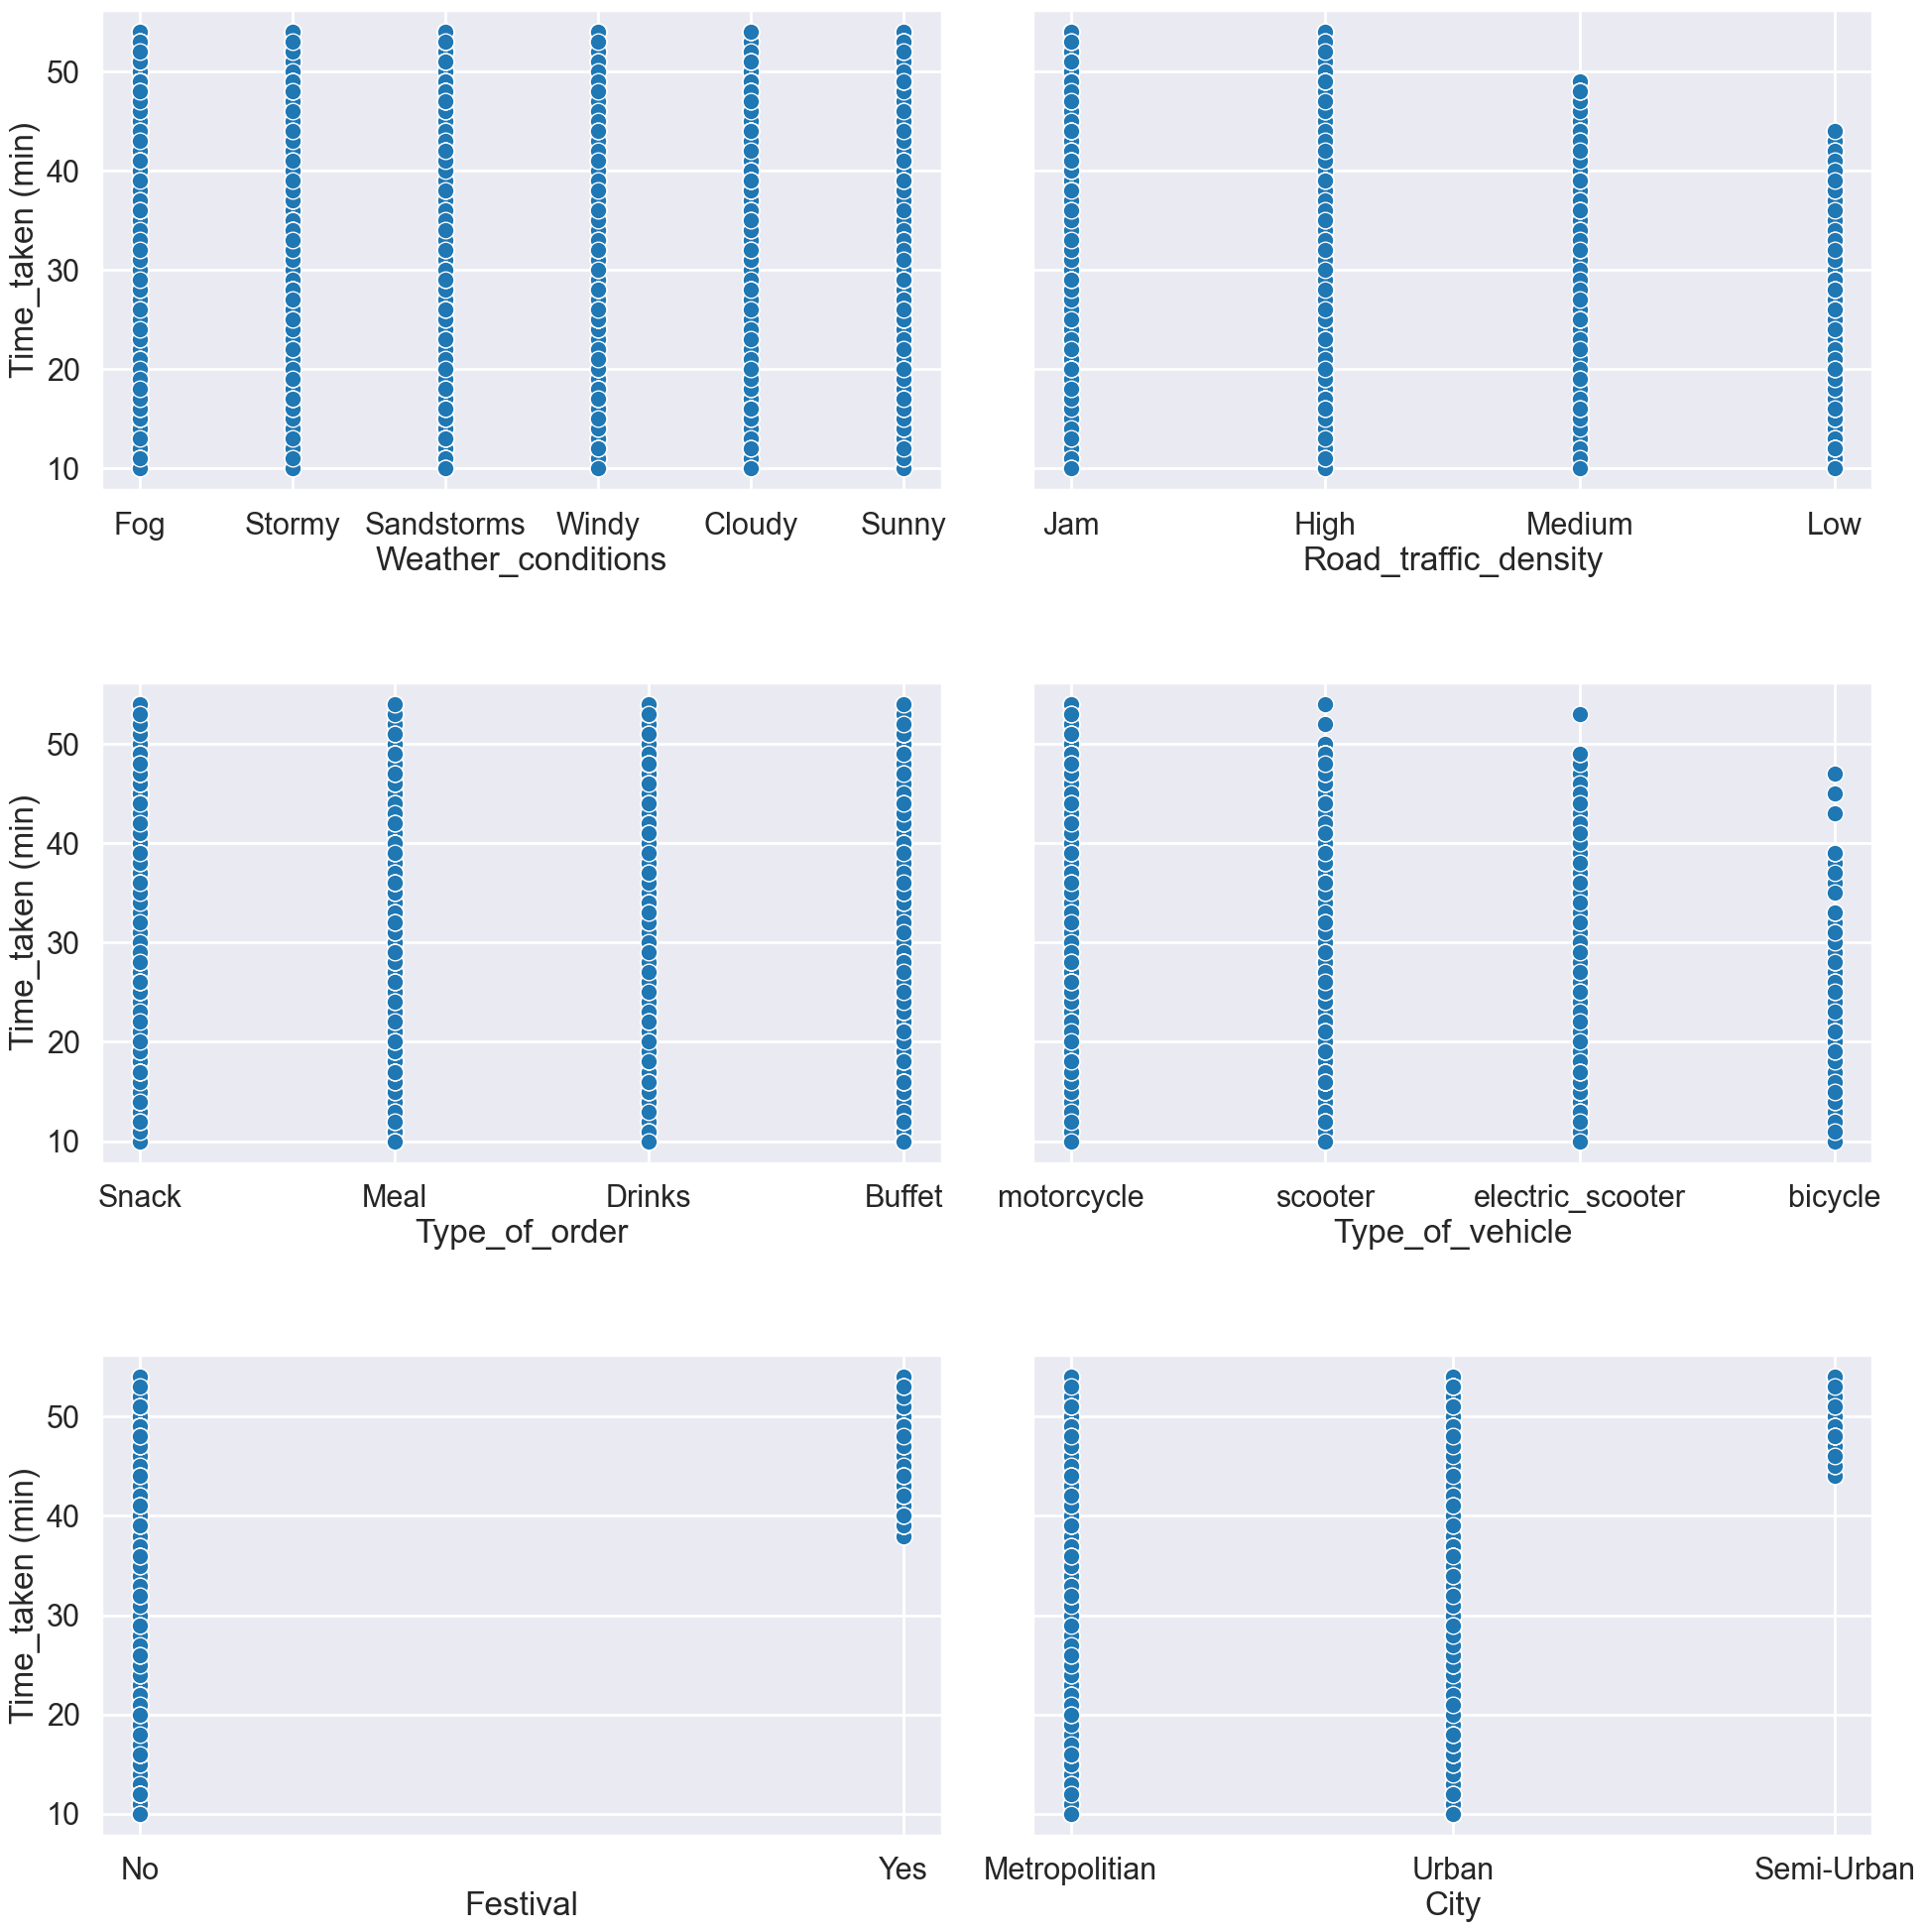

In [ ]:
# Scatter plot of categorical featuress vs time_taken 

fig,axs = plt.subplots(nrows=3, ncols=2,sharey=True,figsize=(20,20))
i = 0
for col in categorical_columns:
    ax = axs[i//2,i%2] 
    sns.scatterplot(data=raw_data,x=col,y='Time_taken (min)',ax = ax)
  
    i += 1

plt.tight_layout()
plt.subplots_adjust(hspace= .4)
plt.show()

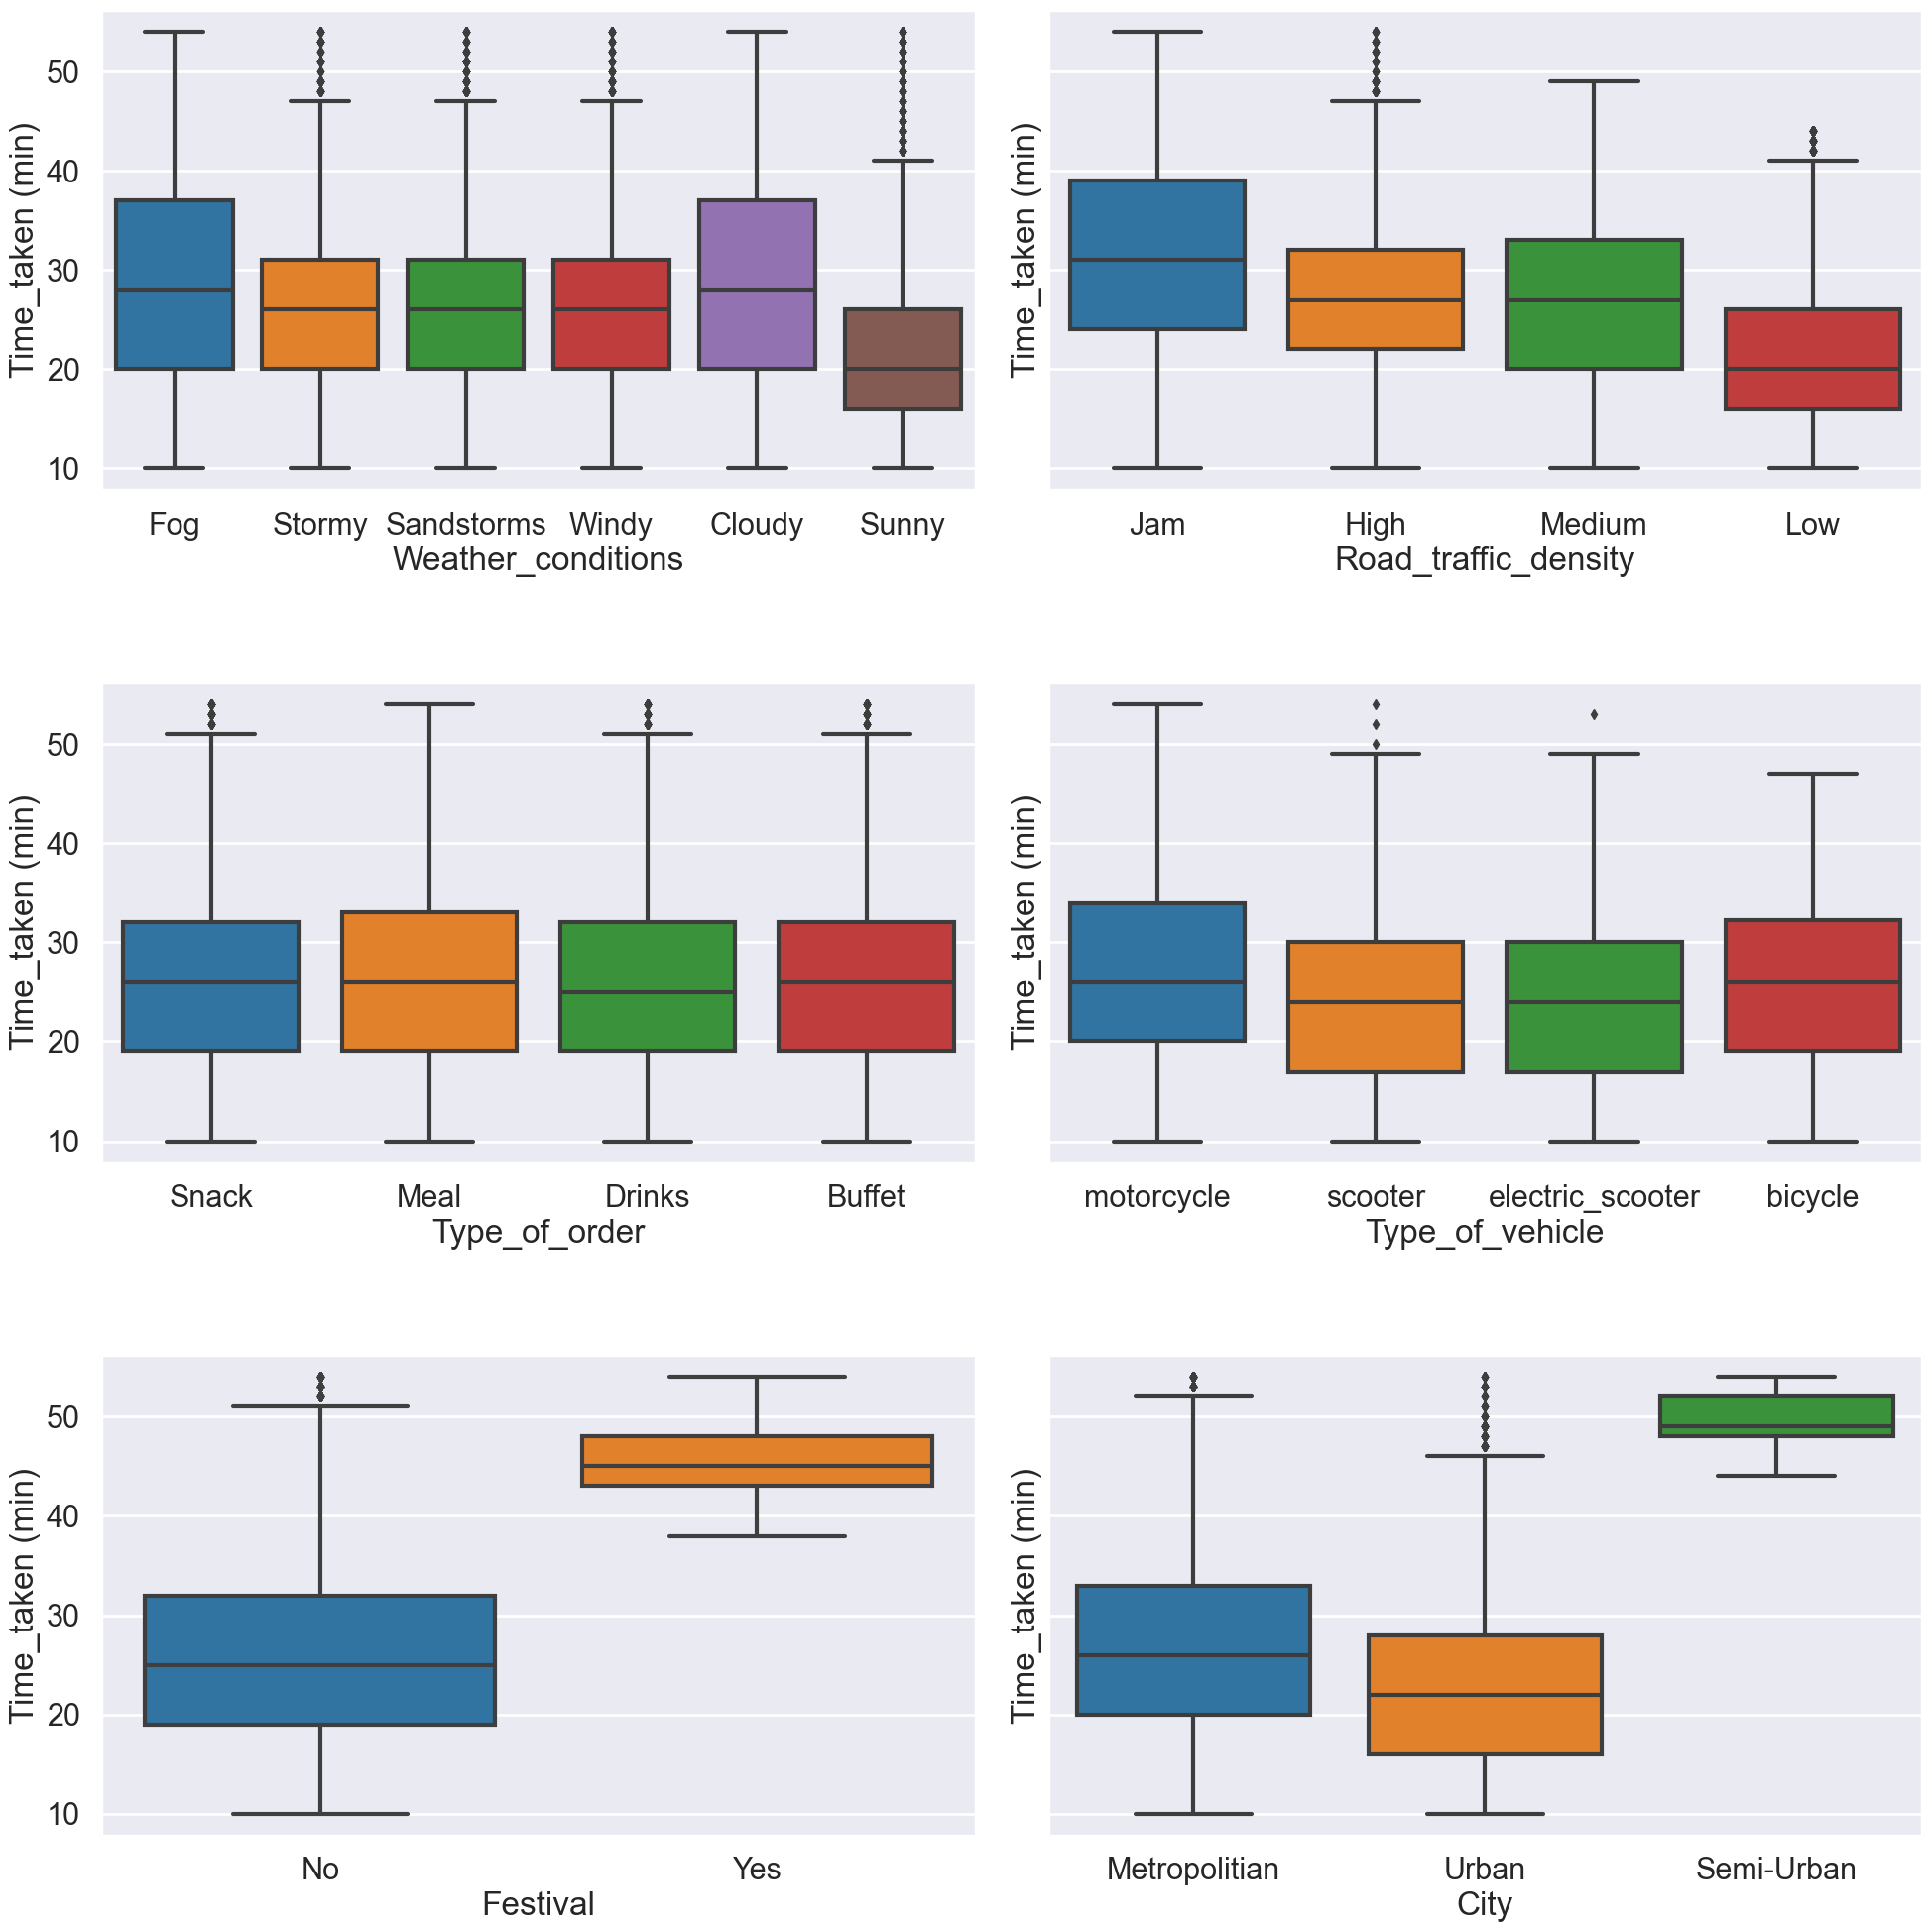

In [ ]:
# box plot time_taken for each lables in each catrgory
# to check if categorical varibale have any correlation with time_taken

fig,axs = plt.subplots(nrows=3, ncols=2,sharey=True,figsize=(20,20))
i = 0
for col in categorical_columns:
    ax = axs[i//2,i%2] 
    sns.boxplot(data=raw_data,x=col,y='Time_taken (min)',ax = ax)
  
    i += 1

plt.tight_layout()
plt.subplots_adjust(hspace= .4)
plt.show()

#### Conclusion from Scatter and BOX plot
* There not much difference in distrituion of time_taken for feature type_of_order so this feature might be not that useful.
* For rest of the features there is difference in distribution of time_takes so these feature could b useful
* All the categorical fetures will be encoded using one hot encoding as 


### creating a new feture distance using features related to latitude and longitude

In [27]:
# observing the numerical features
raw_data[numerical_columns].head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken (min),Day,Month,Year
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21.916667,22.166667,2,3.0,46,12,2,2022
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14.916667,15.083333,1,1.0,23,13,2,2022
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17.500000,17.666667,1,1.0,21,4,3,2022
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,9.333333,9.500000,0,0.0,20,13,2,2022
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.833333,20.083333,1,1.0,41,14,2,2022


In [28]:
##  calculating distance using latitude and longitude using geopy library

import geopy.distance


def distance(
    restaurant_lat: float, restaurant_lon: float, delivery_lat: float, delivery_lon: float,
) -> float:
    """
    function for calculating distance using latitude and longitude
    """

    return geopy.distance.distance((restaurant_lat, restaurant_lon), (delivery_lat,delivery_lon)).km


distance = raw_data.apply(lambda row: distance(row.Restaurant_latitude, row.Restaurant_longitude, row.Delivery_location_latitude,row.Delivery_location_longitude),axis=1)

# adding distance feature in the data
raw_data['restaurant_delivery_location_dist'] = distance

# observing the data again
raw_data.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year,restaurant_delivery_location_dist
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21.916667,22.166667,Fog,Jam,...,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022,10.271464
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14.916667,15.083333,Stormy,High,...,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022,6.229376
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17.500000,17.666667,Sandstorms,Medium,...,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022,13.764306
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,9.333333,9.500000,Sandstorms,Low,...,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022,2.927795
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19.833333,20.083333,Fog,Jam,...,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022,19.373484


In [29]:
# observing the newly added feature 
raw_data['restaurant_delivery_location_dist'].head()

0    10.271464
1     6.229376
2    13.764306
3     2.927795
4    19.373484
Name: restaurant_delivery_location_dist, dtype: float64

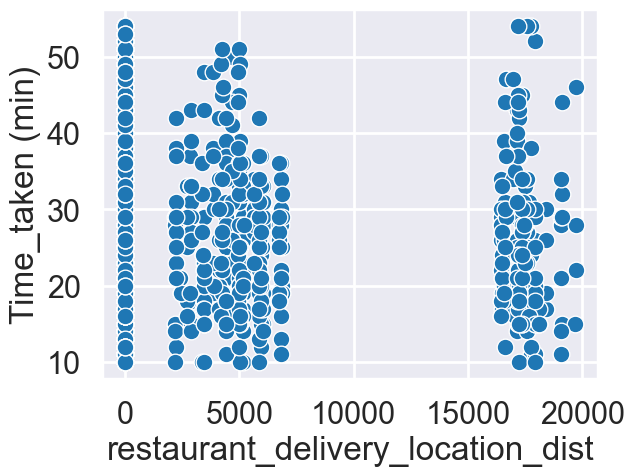

In [ ]:
# scatter plot between 'time_taken' and 'restaurant_delivery_location_dist'
sns.scatterplot(data=raw_data,x='restaurant_delivery_location_dist',y='Time_taken (min)')
plt.show()

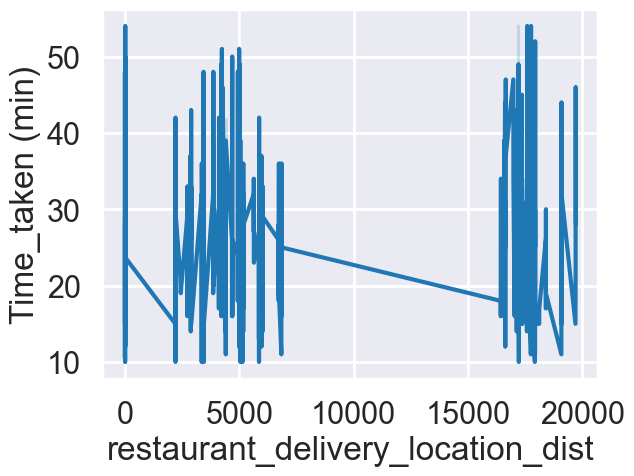

In [ ]:
# line plot between 'time_taken' and 'restaurant_delivery_location_dist'
sns.lineplot(data=raw_data,x='restaurant_delivery_location_dist',y='Time_taken (min)')
plt.show()

* Added new feature is showing slight correlation

<Axes: >

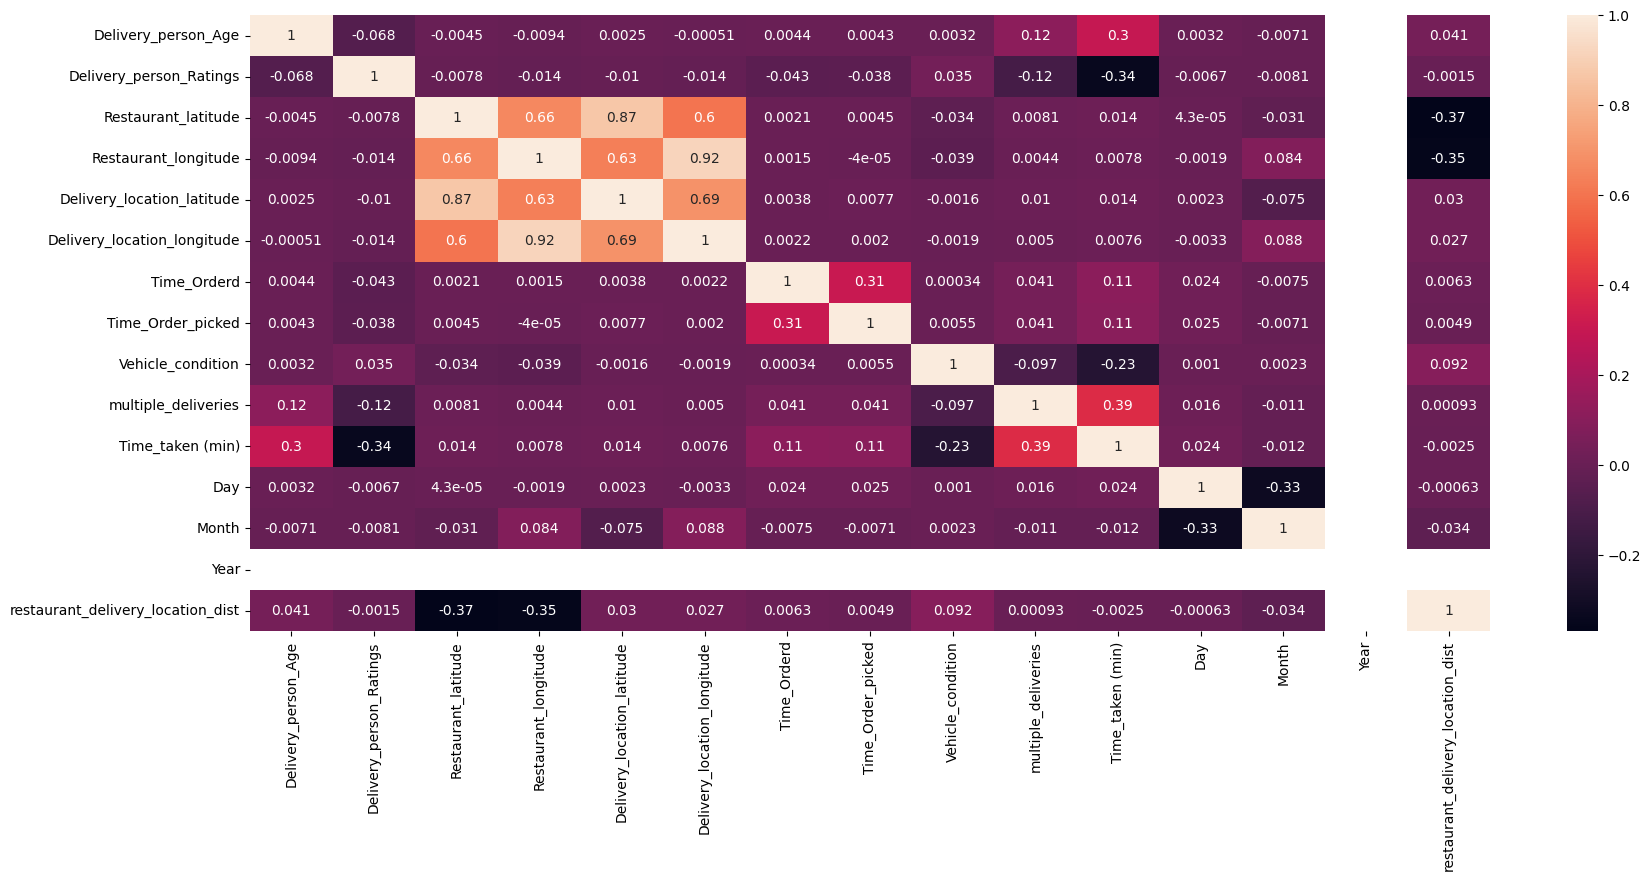

In [34]:
# checking correlation after addition of new feature
numerical_columns=raw_data.columns[raw_data.dtypes!='object']
plt.figure(figsize=(20,8))
sns.heatmap(raw_data[numerical_columns].corr(),annot=True)

* Added new feature is slightly negatively correlated with time taken

In [35]:
raw_data.to_csv('cleaned_data.csv')